In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action = 'ignore')

Challenges of high dimensional data 
1. Difficult to visulization
2.importance of independent variables
3.computational complexity requirements increase when the independent variable is increase.
4.Model interpretabilty
5. data exploration

**Dimensionality Reduction **
The process of reducing the number of variables from the data to ensure that the reduced data conveys maximum information.
*Techniques *:- Feature selection

1.   Missing value ratio 
2.  Low variance 
3. High correlaion #not suitable method 
4. Backward feature elimination 
5. Forward feature selection.









1. missing value ratio.

Ratio of missing values = Number of missing values /                   Total no. of observation.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dimentionality_ reduction/NaN_Housing_Prices.csv")
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,NaN,7,1180.0,NaN,63,47.5112,-122.257,1340.0,5650,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,NaN,7,2170.0,400.0,67,47.7210,-122.319,1690.0,7639,26.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,NaN,6,770.0,NaN,85,47.7379,-122.233,2720.0,8062,NaN,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,NaN,7,1050.0,910.0,53,47.5208,-122.393,1360.0,5000,NaN,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,NaN,8,1680.0,NaN,31,47.6168,-122.045,1800.0,7503,NaN,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        2124 non-null   float64
 7   Overall Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64
 9   Basement Area (in Sqft)                    8486 non-null   float64
 10  Age of House (in Years

In [ ]:
data.isnull().sum()

Sale_Price                                       0
No of Bedrooms                                   0
No of Bathrooms                                  0
Flat Area (in Sqft)                              0
Lot Area (in Sqft)                               0
No of Floors                                     0
No of Times Visited                          19485
Overall Grade                                    0
Area of the House from Basement (in Sqft)        0
Basement Area (in Sqft)                      13123
Age of House (in Years)                          0
Latitude                                         0
Longitude                                        0
Living Area after Renovation (in Sqft)           0
Lot Area after Renovation (in Sqft)              0
Years Since Renovation                       20695
Condition_of_the_House_Excellent                 0
Condition_of_the_House_Fair                      0
Condition_of_the_House_Good                      0
Condition_of_the_House_Okay    

In [ ]:
for i in data.columns:
  tmp =data[i].isnull().sum()/len(data)
  if tmp > 0.70: #threshold 0.70
    print("Removing column" "+"'with missing value ratio', tmp )
    data =data.drop(columns =[i])



Removing column+with missing value ratio 0.9017076218242399
Removing column+with missing value ratio 0.9577028090147623


2.Low variance 

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dimentionality_ reduction/Raw_Housing_Prices.csv")
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [ ]:
numerical_data = data.drop(columns = ['ID', 'Date House was Sold', 'Sale Price',
                               'Waterfront View', 'No of Times Visited',
                            'Condition of the House', 'Overall Grade', 'Zipcode'
                              ])
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   No of Bedrooms                             21613 non-null  int64  
 1   No of Bathrooms                            21609 non-null  float64
 2   Flat Area (in Sqft)                        21604 non-null  float64
 3   Lot Area (in Sqft)                         21604 non-null  float64
 4   No of Floors                               21613 non-null  float64
 5   Area of the House from Basement (in Sqft)  21610 non-null  float64
 6   Basement Area (in Sqft)                    21613 non-null  int64  
 7   Age of House (in Years)                    21613 non-null  int64  
 8   Renovated Year                             21613 non-null  int64  
 9   Latitude                                   21612 non-null  float64
 10  Longitude             

Eliminatig categorical variables 


*   Use the value counts function
*   look at the frequency of distinct categories
*  if frequency it very high frequency (>95%)
eliminate the variable.

In [ ]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
norm_data = norm.fit_transform(numerical_data)

norm_data = pd.DataFrame(norm_data, columns = numerical_data.columns)
norm_data.head()

ValueError: ignored

In [ ]:
tmp = norm_data.var()
tmp

In [ ]:
T = 1e-04 #threshold

for i in tmp:
  if i < T:
    norm_data.drop(columns = [tmp[tmp ==i].index[0]], inplace = True)

norm_data.var()

**#Advanced Dimensionality reduction techniques **


*   Forward selection of features 
*   Backward elimanation of features

**R^2:**


1.  It does not consider the number of input variables in the model
2.  the values keep on marginally increasing even if the newly added feature has zero to minimal importance.

Adjusted R^2 = 1 (n-1)/ (n-k+1) (1-R^2)
~n - total no. of observation 0r sample size
~k - the no. of input variables in our regression model.
~R^2  the simple R^2 score.

**if k=0,the value of the fraction becomes 1.
Therfore Adjust R^2= R^2.**
1. the new feature added **contributes significantly** to model performance.  
(adj  R^2 inf R^2/k  ) overall increased.

2. the new feature added  **doesnotcontributes significantly** to model performance. 
over decrese.

More nonsignificant variable is added to the variable the R^2 is increated.






#Backward/Forward selection

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dimentionality_ reduction/Transformed_Housing_Data2.csv')
data.head()


,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
## Scaling the dataset 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns = ['Sale_Price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,-0.306226,-0.943307,-0.260741,-0.167463,-0.292306,0.735132,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,-0.746479,-0.432664,-0.187900,4.757239,-0.292306,0.735132,-0.597003,-0.089574,4.758385,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,-0.135806,1.070082,-0.172409,-0.167463,-0.292306,0.735132,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,-1.271941,-0.914127,-0.284546,-0.167463,3.421068,-1.360300,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,1.199152,-0.272177,-0.192880,-0.167463,-0.292306,0.735132,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [ ]:
## Train/Test set

X = data.drop(columns = ["Sale_Price"])
Y = data['Sale_Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 30), (6483, 30), (15126,), (6483,))

In [ ]:
## Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [ ]:
predictions = lr.predict(x_test)

In [ ]:
lr.score(x_test, y_test)

0.8462355542468782

In [ ]:
# forward selection
def adj_r2( data_x,data_y, predictions):
   from sklearn.metrics import r2_score
   R= r2_score(data_y, predictions)
   n= len(data_y)
   m= len(data_x. columns)
   adj_R = 1-((1-R)*(n-1))/(n-m-1)
   return adj_R

In [ ]:
adj_r2(x_test, y_test, predictions)

0.8455205924718328

Forward selection techniques:
step_1:
For every indepedent variable, bulid a linear regressio model individuality. Choose the independent variable with the highest adj-R^2 
score and call it Var1

step_2:
Repeat the above process by using the Var1 as the base independent variable and combining it with every other independent variable to bulid a regression model. Choose the combination with hightest adjR^2score.

Step_3 
Repeat the above process until maximum number of features has been obtained or the adj-R^2 score is no longer increasing.



# Forward selection

In [ ]:
# Forward selection


def adj_r2( m ,data_y, predictions):
  '''
  m : number of independent variables
  data_y : target variable
  predictions : prediction of the model to be evaluated

  Returns: Adjusted R2
  '''

  from sklearn.metrics import r2_score
  R = r2_score(data_y, predictions)
  n = len(data_y)
  adj_R = 1 - ((1-R)*(n-1))/(n-m-1)
  return adj_R




In [ ]:
def return_r2(X, Y, model):
  '''
  X : independent variables
  Y : target variable
  model : predictive model

  Returns: Adjusted R2 corresponding to the model
  '''
  model.fit(X, Y)
  pred = model.predict(X)
  m = len(X.columns)
  r2 = adj_r2(m, Y, pred)
  return r2


In [ ]:
def forward_selection(model, X, Y, max_features):
  '''
  X : independent variables
  Y : target variable
  model : predictive model
  max_features : selects best feature upto max_features value

  Returns: 
  Rmax : Adjusted R2 of the final model
  history : list of Rmax at every new independent variable added to the model
  x[f_col] : best features upto max_features
  '''
  
  f_col = []/
  history = []
  
  for i in range(max_features):

    f_col.append('blank')
    tmp = f_col[:]
    Rmax = -1

    for var in X.columns:
      tmp[-1] = var
      r2 = return_r2( X[tmp] , Y, model)
      if r2 >= Rmax:
        Rmax = r2
        f_col[-1] = var
        elim = var
  
    print("Selected",f_col[-1],"with new r2 =",Rmax)
    history.append(Rmax)

  return Rmax, history, X[f_col]

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)

score, history, sel_data = forward_selection(lr, x_train, y_train, 5)# 5- max features (fn top 5 features

Selected Flat Area (in Sqft) with new r2 = 0.4825106645259518
Selected Latitude with new r2 = 0.6158682713046579
Selected Overall Grade with new r2 = 0.669325084451791
Selected Age of House (in Years) with new r2 = 0.7101671809322652
Selected Zipcode_Group_Zipcode_Group_8 with new r2 = 0.7359659801896957


In [ ]:
sel_data.columns

Index(['Flat Area (in Sqft)', 'Latitude', 'Overall Grade',
       'Age of House (in Years)', 'Zipcode_Group_Zipcode_Group_8'],
      dtype='object')

In [ ]:
score

0.7359659801896957

# Backward Elimination

step-1 Bulid a model with all the independent variables 
step-2 
* drop 1 indepedent variable at a time 
* repeat the process 
* calculating the corresponding adjR^2 
*repeat the process
Step - 3 
subtract the baseliine adj- R^2 from all calcuated adj- R^2 and record the difference 
Step-4 
Make the maximum difference value as the neew baseline adj- R^2  and permentently drop the independent variable corresponding to it.
step 5
repeat the process for the required number of times equal to no. independent variable

__ what range of values can the different btw
the calculated and baseline adj- R^2  take? which one is more favorable?
CASE1'
calculated adj- R^2  - baseline adj- R^2 >0
( Dropping that corresponding variable actually important the model.) 
CASE2'
calculated adj- R^2  - baseline adj- R^2 <0
(The removal of the indepedent variable decrease the model  performance - A good pt to stop the backward eliminations)

In [ ]:
def adj_r2( m=0, data_y=0, predictions=0):
  '''
  m : number of independent variables
  data_y : target variable
  predictions : prediction of the model to be evaluated

  Returns: Adjusted R2
  '''

  from sklearn.metrics import r2_score
  R = r2_score(data_y, predictions)
  n = len(data_y)
  adj_R = 1 - ((1-R)*(n-1))/(n-m-1)
  return adj_R



In [ ]:
def return_r2(X, Y, model):
  '''
  X : independent variables
  Y : target variable
  model : predictive model

  Returns: Adjusted R2 corresponding to the model
  '''
  model.fit(X, Y)
  pred = model.predict(X)
  m = len(X.columns)
  r2 = adj_r2(m, Y, pred)
  return r2

In [ ]:
def backward_elimination( model, X, Y, min_features):
  '''
  X : independent variables
  Y : target variable
  model : predictive model
  min_features : eliminate worst features until only min_features are left

  Returns: 
  Rmax : Adjusted R2 of the final model
  history : list of Rmax at every new independent variable added to the model
  x[f_col] : best features upto max_features
  '''
  elim_data = X[:]
  r2_history = []
  base_r2 = return_r2(elim_data, Y, model)
  print("base_r2 is", base_r2)


  for i in range(X.shape[1] - min_features):
  
    difference = -100

    for var in elim_data.columns:
      tmp = elim_data.drop(columns = [var])
      r2 = return_r2(tmp, Y, model)

      if (r2 - base_r2) > difference:
        difference = r2 - base_r2
        eliminate = var
        new_r2 = r2
  
    elim_data.drop(columns = [eliminate], inplace = True)
    r2_history.append(new_r2)
    print(eliminate,"Eliminated : New adj_r2 = ",new_r2,)
    base_r2 = new_r2

  return base_r2, r2_history, elim_data

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)

score , history, survided_data = backward_elimination(lr, x_train, y_train, 1)

base_r2 is 0.8411713183817104
Area of the House from Basement (in Sqft) Eliminated : New adj_r2 =  0.8411797446658431
Condition_of_the_House_Okay Eliminated : New adj_r2 =  0.8411623663620639
No of Floors Eliminated : New adj_r2 =  0.8411171250786783
Lot Area after Renovation (in Sqft) Eliminated : New adj_r2 =  0.8410610037918913
No of Bedrooms Eliminated : New adj_r2 =  0.8409159992800566
Condition_of_the_House_Fair Eliminated : New adj_r2 =  0.8407704362899258
Condition_of_the_House_Good Eliminated : New adj_r2 =  0.8404605503169833
Years Since Renovation Eliminated : New adj_r2 =  0.8399491254999183
Ever_Renovated_Yes Eliminated : New adj_r2 =  0.8394089149738739
No of Bathrooms Eliminated : New adj_r2 =  0.8384257980145959
Living Area after Renovation (in Sqft) Eliminated : New adj_r2 =  0.837125308901623
Waterfront_View_Yes Eliminated : New adj_r2 =  0.8356698063157927
Zipcode_Group_Zipcode_Group_1 Eliminated : New adj_r2 =  0.8339600690154835
Lot Area (in Sqft) Eliminated : New 

In [ ]:
history

[0.8411797446658431,
 0.8411623663620639,
 0.8411171250786783,
 0.8410610037918913,
 0.8409159992800566,
 0.8407704362899258,
 0.8404605503169833,
 0.8399491254999183,
 0.8394089149738739,
 0.8384257980145959,
 0.837125308901623,
 0.8356698063157927,
 0.8339600690154835,
 0.8318506623682476,
 0.8295620645811875,
 0.8266049066242156,
 0.8242921707826699,
 0.819291038187841,
 0.8135013723628122,
 0.7999680310309634,
 0.7819399099884952,
 0.770302160770225,
 0.7580319410320749,
 0.745451210409211,
 0.7245993616828927,
 0.7001983572378965,
 0.669325084451791,
 0.6158682713046579,
 0.4825106645259518]

Text(0.5, 1.0, 'Backward Elimination')

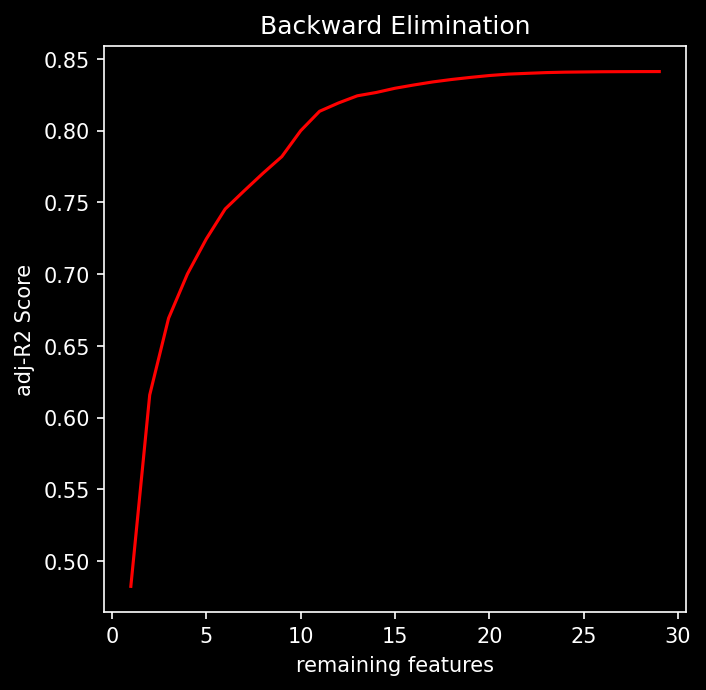

In [ ]:
plt.figure(figsize = (5,5), dpi = 150)
plt.plot(range(len(history),0,-1), history, color = 'red')
plt.xlabel('remaining features')
plt.ylabel('adj-R2 Score')
#plt.yticks([z/100 for z in range()])
plt.title('Backward Elimination')